# MNIST GAN 1.0

Another change of architecture to even more closely follow a known working architecture
(see https://www.tensorflow.org/tutorials/generative/dcgan)

See model_summary in Testing_Runs directory

Main changes:
  - Complete removal of BatchNormalisation in discriminator (this was by far the most fruitful change)
  - Removal of sigmoid from output of discriminator in favour of BinaryCrossentropy **with logits** (to prevent loss going to 0)
  - TTUR (different learning rates for Generator and Discriminator)
  - **Unmixed** training of discriminator
  - Simplification of block for both generator and discriminator

In [8]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist

import pickle

In [9]:
# mnist_ex.preprocess_real(save_only=True)
# real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
# real_train.shape
(real_train, _), _ = mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

(60000, 28, 28, 1)

In [35]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [36]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

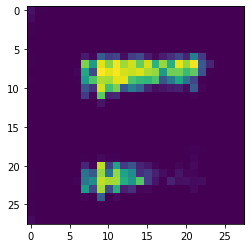

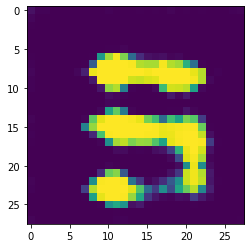

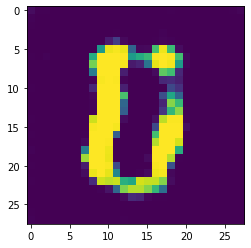

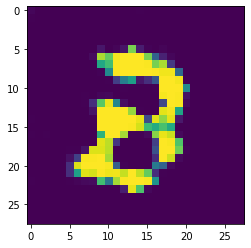

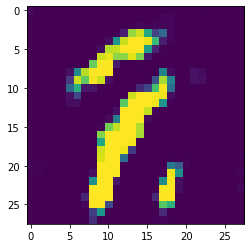

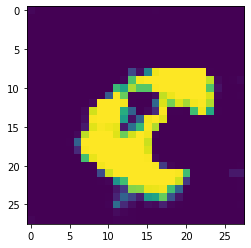

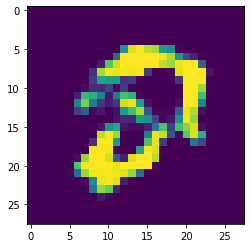

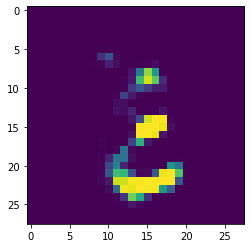

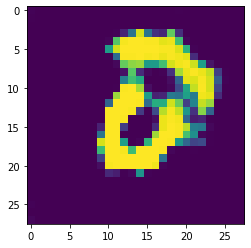

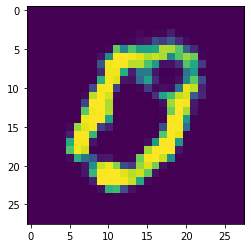

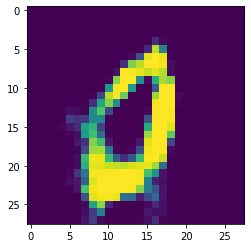

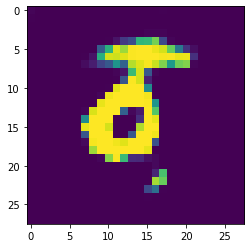

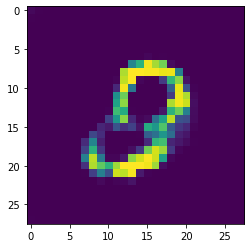

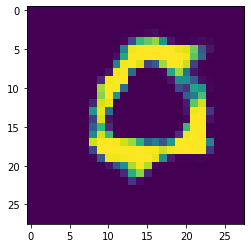

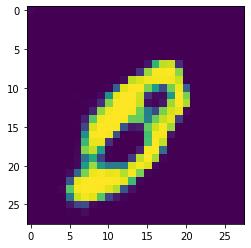

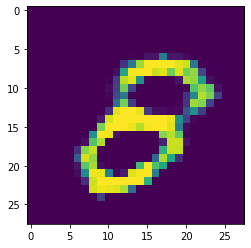

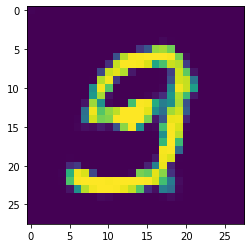

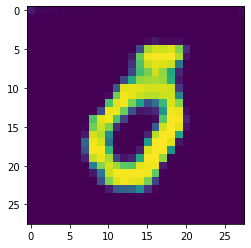

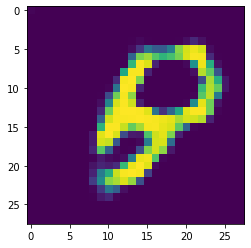

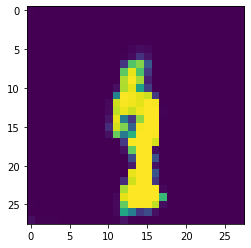

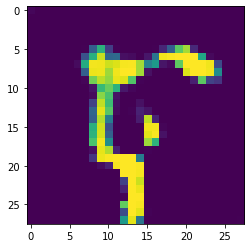

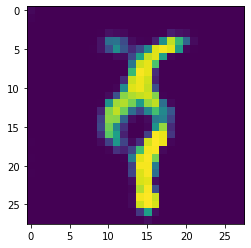

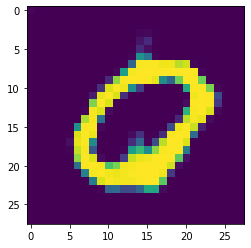

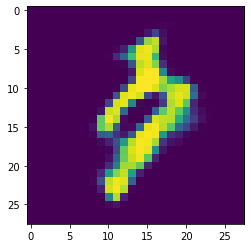

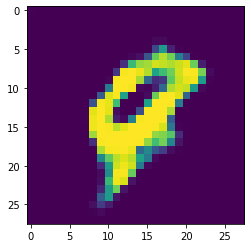

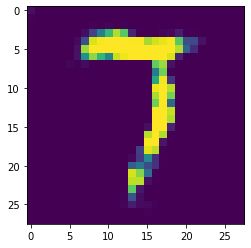

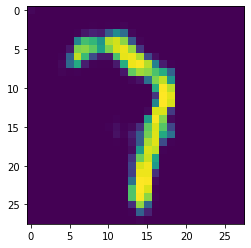

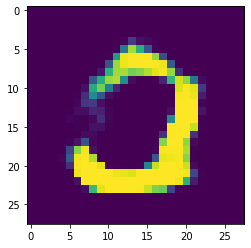

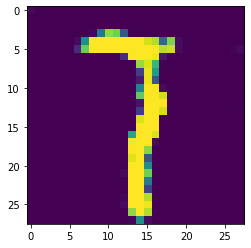

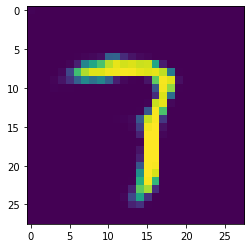

In [37]:
model.train(real_train, num_epochs=30, batch_size=60)

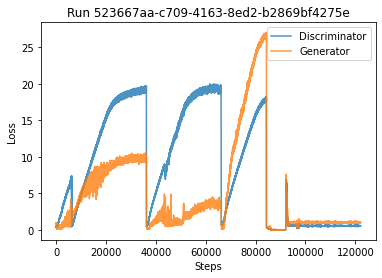

In [38]:
model.history.plot_loss()

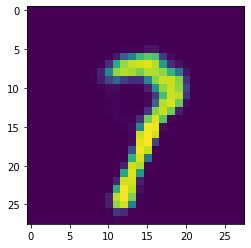

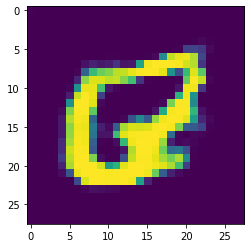

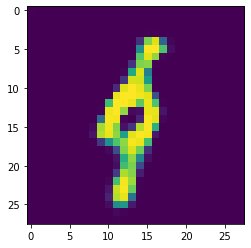

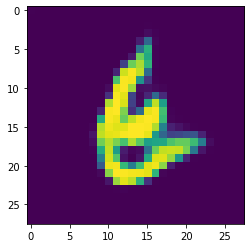

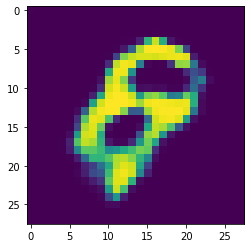

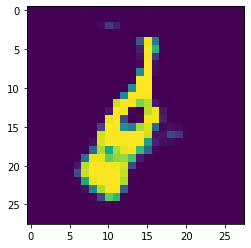

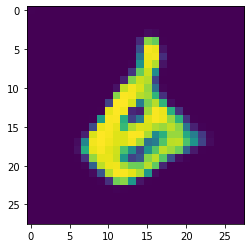

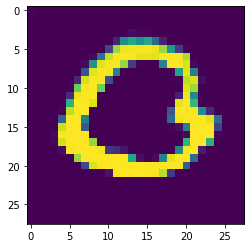

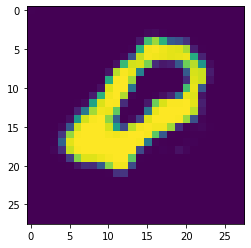

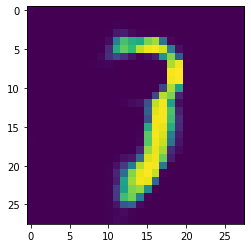

In [41]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 100))
  plt.imshow(fake_img.reshape(28, 28))
  plt.show()

We can see that this architecture performs far better than all previous models at generating convincing images.

However, the model is still far from perfect.

Main problems:
  - A significant proportion of the above sample cannot be recognised as only one digit. This is despite the loss plot suggesting that the model did stabilise over the last few epochs.

  - There is some evidence of modal collapse since the model mainly generates one-like and zero-like digits.

  - There is some evidence to suggest the model has is unable to generate the more complex digits (e.g. 4 and 5). 


Potential solutions:
  - It is worth re-testing label smoothing with this new architecture.
  - Implement a form of minibatch discrimination to prevent modal collapse.

  
Points of investigation:
  - Loss plot displays a repeating pattern; rapid collapse of loss to 0 and steady climb back.


In [39]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")

updating: content/Training_Runs/ (stored 0%)
updating: content/Training_Runs/dd0b9f50-dd84-4b29-8a44-e370a7f74495/ (stored 0%)
updating: content/Training_Runs/dd0b9f50-dd84-4b29-8a44-e370a7f74495/model_summary.txt (deflated 87%)
updating: content/Training_Runs/dd0b9f50-dd84-4b29-8a44-e370a7f74495/img_epoch1.png (deflated 13%)
updating: content/Training_Runs/dd0b9f50-dd84-4b29-8a44-e370a7f74495/img_epoch3.png (deflated 13%)
updating: content/Training_Runs/dd0b9f50-dd84-4b29-8a44-e370a7f74495/img_epoch2.png (deflated 14%)
updating: content/Training_Runs/f068f70d-b59e-4b57-b086-5c89417d41bc/ (stored 0%)
updating: content/Training_Runs/f068f70d-b59e-4b57-b086-5c89417d41bc/img_epoch5.png (deflated 12%)
updating: content/Training_Runs/f068f70d-b59e-4b57-b086-5c89417d41bc/img_epoch4.png (deflated 13%)
updating: content/Training_Runs/f068f70d-b59e-4b57-b086-5c89417d41bc/img_epoch30.png (deflated 12%)
updating: content/Training_Runs/f068f70d-b59e-4b57-b086-5c89417d41bc/img_epoch13.png (deflated

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>